In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:/Users/dell/OneDrive/Documents/NLPCW1/Merged-file.tsv", delimiter='\t')

In [3]:
df.columns=['ID','Tweet','Tag']

In [4]:
df

,ID,Tweet,Tag
0,6.489790e+17,ERMAHGERD PEHRMKIN SPERCE!!! #AutumnIn3Words @...,0
1,6.487030e+17,New NBC Cancellations @midnight #AutumnIn3Words,2
2,6.487010e+17,Winter's pretty sister #AutumnIn3Words @midnight,1
3,6.487020e+17,Netflix and chill \U0001f609 #AutumnIn3Words @...,1
4,6.487010e+17,Leaf me alone #AutumnIn3Words @midnight,1
...,...,...,...
916,7.175680e+17,Denture The Dragon #ElderlyMovies @midnight,1
917,7.175590e+17,Brittle Women #ElderlyMovies @midnight,2
918,7.175990e+17,Legends Of The Fall & Break A Hip #ElderlyMovi...,1
919,7.175560e+17,Peter Bed Pan #ElderlyMovies @midnight,1


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [6]:
df['clean_text'] = df['Tweet'].apply(clean_text)

In [7]:
df

,ID,Tweet,Tag,clean_text
0,6.489790e+17,ERMAHGERD PEHRMKIN SPERCE!!! #AutumnIn3Words @...,0,ermahgerd pehrmkin sperce autumninwords
1,6.487030e+17,New NBC Cancellations @midnight #AutumnIn3Words,2,new nbc cancellations autumninwords
2,6.487010e+17,Winter's pretty sister #AutumnIn3Words @midnight,1,winters pretty sister autumninwords
3,6.487020e+17,Netflix and chill \U0001f609 #AutumnIn3Words @...,1,netflix and chill uf autumninwords
4,6.487010e+17,Leaf me alone #AutumnIn3Words @midnight,1,leaf me alone autumninwords
...,...,...,...,...
916,7.175680e+17,Denture The Dragon #ElderlyMovies @midnight,1,denture the dragon elderlymovies
917,7.175590e+17,Brittle Women #ElderlyMovies @midnight,2,brittle women elderlymovies
918,7.175990e+17,Legends Of The Fall & Break A Hip #ElderlyMovi...,1,legends of the fall break a hip elderlymovies
919,7.175560e+17,Peter Bed Pan #ElderlyMovies @midnight,1,peter bed pan elderlymovies


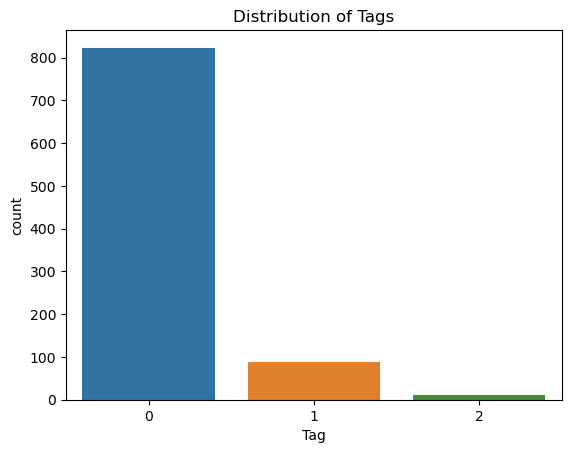

In [8]:
sns.countplot(x='Tag', data=df)
plt.title('Distribution of Tags')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Tag'], test_size=0.2, random_state=42)


In [10]:
vectorizer = TfidfVectorizer(max_features=5000, lowercase=True, stop_words='english')


In [11]:
X_train_tfidf = vectorizer.fit_transform(X_train)


In [12]:
X_test_tfidf = vectorizer.transform(X_test)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

In [13]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    return accuracy, f1, precision, recall

In [14]:
results = {}
for name, clf in classifiers.items():
    print(f'Training {name}...')
    clf.fit(X_train_tfidf, y_train)
    print(f'Evaluating {name}...')
    accuracy, f1, precision, recall = evaluate_model(clf, X_test_tfidf, y_test)
    results[name] = [accuracy, f1, precision, recall]

Training Random Forest...
Evaluating Random Forest...
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       162
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         3

    accuracy                           0.88       185
   macro avg       0.29      0.33      0.31       185
weighted avg       0.77      0.88      0.82       185

Confusion Matrix:
 [[162   0   0]
 [ 20   0   0]
 [  3   0   0]]
Training Decision Tree...
Evaluating Decision Tree...
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       162
           1       0.10      0.15      0.12        20
           2       0.00      0.00      0.00         3

    accuracy                           0.75       185
   macro avg       0.32      0.33      0.32       185
weighted avg       0.78      0.75      0.76       185

Confusion Matrix:
 [[135  27   0]
 [ 17   3   0]
 [  2   1   0]]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classificati

In [15]:
results_df = pd.DataFrame(results, index=['Accuracy', 'F1 Score', 'Precision', 'Recall'])


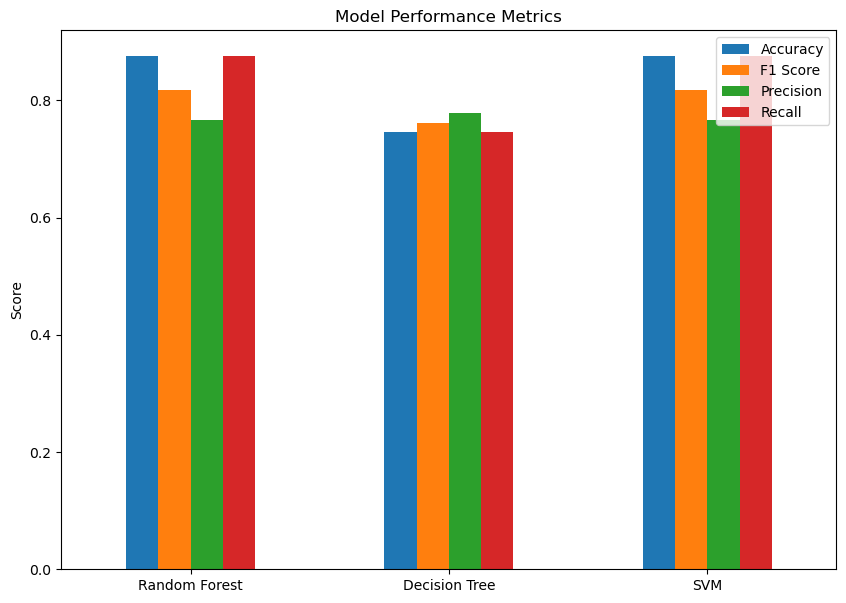

In [16]:
results_df.T.plot(kind='bar', figsize=(10, 7))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [24]:
example_tweet = "Can't Touch This Thermostat #DadSongs @midnight"
example_cleaned = clean_text(example_tweet)
example_tfidf = vectorizer.transform([example_cleaned])
example_prediction = classifiers['Random Forest'].predict(example_tfidf)
print(f'Prediction for example tweet: {example_prediction[0]}')

Prediction for example tweet: 2


In [28]:
def predict_humor(tweet, model, vectorizer):
    cleaned_tweet = clean_text(tweet)
    vectorized_tweet = vectorizer.transform([cleaned_tweet])
    prediction = model.predict(vectorized_tweet)
    return 'Humorous' if prediction[0] == 1 or 2 else 'Not Humorous'


In [29]:
example_tweet = "Can't Touch This Thermostat #DadSongs @midnight"
chosen_model = classifiers['Random Forest']  # You can choose any trained model
prediction = predict_humor(example_tweet, chosen_model, vectorizer)
print(f'Prediction for example tweet: {prediction}')

Prediction for example tweet: Humorous
